In [ ]:
#Instala as libs necessárias
!pip install networkx==2.3
!pip install scikit-fuzzy

     |████████████████████████████████| 1.8MB 25.2MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556408 sha256=46accfa20b3fd40c7e0ed3a193bc5e6f08fc257bf58e0e414b266aaef3e40543
  Stored in directory: /root/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: networkx 2.5
    Uninstalling networkx-2.5:
      Successfully uninstalled networkx-2.5
     |████████████████████████████████| 1.0MB 21.0MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=254610375c85f661eb1dd8f84d15a4de09fa08e9d191b1eef0469dcce32a9208
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


#### **Exercício 1** : 1° Parte AP3
#### **Aluno** : Alexei Alves de Souza - 398611
#### **Aluno** : Natanael moreira de lemos - 398447

#### **Professor** : José Almeida do Nascimento

#### **Problema:**
#### **O analista de projetos de uma determinada empresa determinada empresa quer determinar o risco de determinado projeto com base na quantidade de dinheiro e de pessoas envolvidas no projeto.**

In [ ]:
#Importa as Libs que serão utilizadas
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#### **1. Fuzzificação** : 

Variáveis Fuzzy

Dinheiro
*   Inadequado
*   Médio
*   Adequado

Pessoal
*   Baixo
*   Alto

Risco
*   Pequeno
*   Médio
*   Grande

Aqui vemos os termos das variáveis fuzzy que serão utilizados na fuzzificação.

In [ ]:
#Variáveis do Problema
dinheiro = ctrl.Antecedent(np.arange(0, 101, 1), 'dinheiro')
pessoal = ctrl.Antecedent(np.arange(0, 101, 1), 'pessoal')
risco = ctrl.Consequent(np.arange(0, 101, 1), 'risco')

Aqui definimos as funções de pertinência de cada variável baseado nos gráficos do problema dado.

In [ ]:
#Funções de pertinência

dinheiro['inadequado'] = fuzz.trapmf(dinheiro.universe, [0, 0, 30,50])
dinheiro['medio'] = fuzz.trimf(dinheiro.universe,[30,50,70])
dinheiro['adequado'] = fuzz.trapmf(dinheiro.universe[::-1], [0,0,30,50])

pessoal['baixo'] = fuzz.trapmf(pessoal.universe, [0, 0,30,70])
pessoal['alto'] = fuzz.trapmf(pessoal.universe[::-1], [0, 0, 30,70])

risco['pequeno'] = fuzz.trapmf(risco.universe, [0, 0, 40,60])
risco['medio'] = fuzz.trimf(risco.universe, [40,60,80])
risco['alto'] = fuzz.trapmf(risco.universe[::-1], [0,0,20,40])

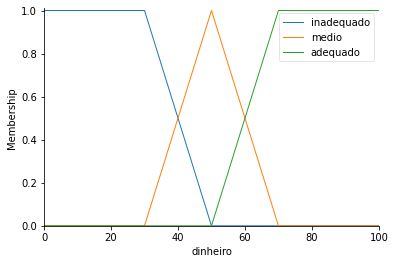

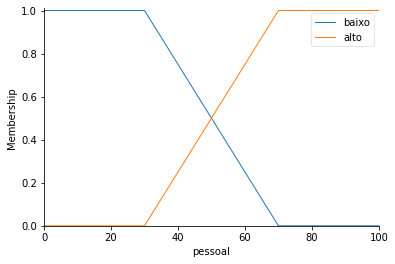

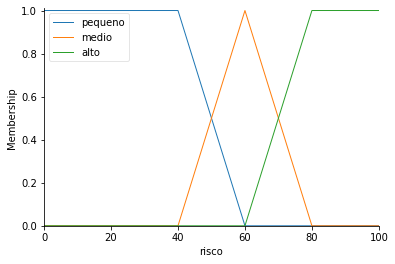

In [ ]:
#Plot das funções de pertinência para cada variável
dinheiro.view()
pessoal.view()
risco.view()


#### **2. Inferência** :

In [ ]:
# Cria as regras Fuzzy

rule1 = ctrl.Rule(dinheiro['adequado'] | pessoal['baixo'], risco['pequeno'])
rule2 = ctrl.Rule(dinheiro['medio'] & pessoal['alto'], risco['medio'])
rule3 = ctrl.Rule(dinheiro['inadequado'], risco['alto'])

In [ ]:
risco_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
risco_simulador = ctrl.ControlSystemSimulation(risco_ctrl)

# Entrando com alguns valores de dinheiro e pessoa para testar o risco
risco_simulador.input['dinheiro'] = 50
risco_simulador.input['pessoal'] = 60
risco_simulador.compute()


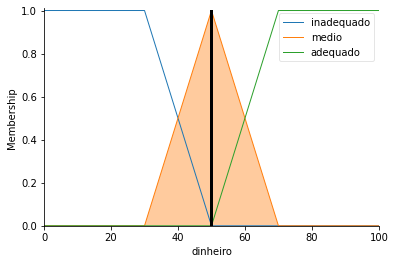

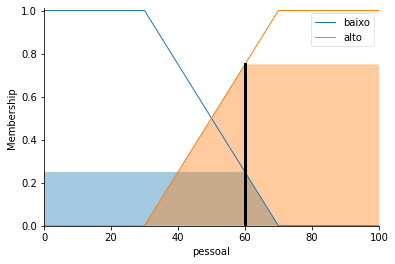

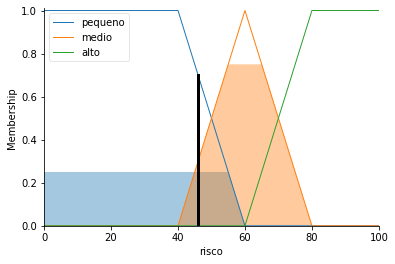

In [ ]:
dinheiro.view(sim=risco_simulador)
pessoal.view(sim=risco_simulador)
risco.view(sim=risco_simulador)

#### **Análise dos gráficos**
#### **1o Regra**-> Dinheiro adequado ou pessoal baixo : Grau de pertinência 0 para dinheiro adequado(não corta o gráfico) e 0.2 para pessoal baixo. Gera consequente 0.2 para risco baixo.
#### **2o Regra** -> Dinheiro médio e pessoal alto : Grau de pertinência 1 para dinheiro médio e 0.8 para pessoal alto. Gera consequente 0.8 para risco médio.
#### **3o Regra** -> Dinheiro inadequado : Grau 0 para dinheiro inadequado. Gera consequente 0 para risco alto.

#### **3. Defuzzificação** : 

In [ ]:
# A partir dos resultados obtidos na inferência é obtido o resultado 
print(risco_simulador.output['risco'])

45.99290780141847


#### **Análise do Resultado** :
#### A partir das funções de pertinência utilizadas Obtemos o risco de aproximadamente 46% para as funções de pertinência utilizadas.
##### Obs: Note que os valores poderão ser diferente devido a utilização de dierentes funções de pertinência na fuzzificação.